In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk 
from nltk.corpus import stopwords
import numpy as np

In [3]:
Location = r'C:\Users\Ανδριαννα\Desktop\python\fulltext\train_set.TSV'

df = pd.read_csv(Location, sep='\t')

Location =r'C:\Users\Ανδριαννα\Desktop\python\fulltext\test_set.TSV'

test = pd.read_csv(Location, sep='\t')

Location = r'C:\Users\Ανδριαννα\Desktop\python\fulltext\res.TSV'

results = pd.read_csv(Location, sep='\t')

In [4]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

def stem_text(text):    
    stm = PorterStemmer()
    tokenized = word_tokenize(text)
    stem_tokes = []
    for toke in tokenized:
        stem_tokes.append(stm.stem(toke))
    stem_tokes
    combined = ''
    for stemmed in stem_tokes:
        combined += stemmed + ' '
    return combined

In [5]:
from nltk.stem import WordNetLemmatizer 
  
lemmatizer = WordNetLemmatizer() 

# nltk.download('wordnet')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [6]:
df=df.astype(str)
df=df.apply(lambda col: col.str.lower())
df = df.replace('\n',' ', regex=True)

test=test.astype(str)
test=test.apply(lambda col: col.str.lower())
test = test.replace('\n',' ', regex=True)


In [7]:
dftech=df.copy()
dftech = dftech[(dftech['Category'] =='tech')]

dfbus=df.copy()
dfbus = dfbus[(dfbus['Category'] =='business')]

dfsport=df.copy()
dfsport = dfsport[(dfsport['Category'] =='sport')]

dfentert=df.copy()
dfentert = dfentert[(dfentert['Category'] =='entertainment')]

dfpol=df.copy()
dfpol = dfpol[(dfpol['Category'] =='politics')]

In [8]:
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['said','would','also','is','the','with','and','in','that','of','but','this']
stopwords.extend(newStopWords)

In [9]:
#1

Tech cloud


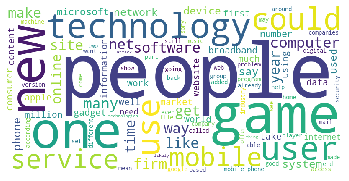

In [10]:

cloud = WordCloud(width=800,height=400,min_word_length=3,background_color="white", max_words=100, stopwords=stopwords)
text=dftech['Title'].str.cat(sep='\n')
text1=dftech['Content'].str.cat(sep='\n')
tech_cloud = cloud.generate(text+text1)
plt.figure()
plt.imshow(tech_cloud)
plt.axis("off")
print("Tech cloud")

plt.show()

Business cloud


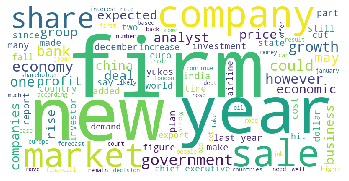

In [11]:
cloud = WordCloud(width=800,height=400,min_word_length=3,background_color="white", max_words=100, stopwords=stopwords)
text=dfbus['Title'].str.cat(sep='\n')
text1=dfbus['Content'].str.cat(sep='\n')
bus_cloud = cloud.generate(text+text1)
plt.figure()
plt.imshow(bus_cloud)
plt.axis("off")
print("Business cloud")
plt.show()

Sport cloud


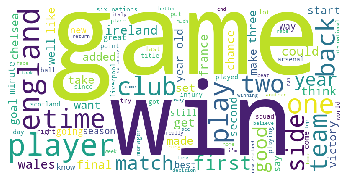

In [12]:
cloud = WordCloud(width=800,height=400,min_word_length=3,background_color="white", max_words=100, stopwords=stopwords)
text=dfsport['Title'].str.cat(sep='\n')
text1=dfsport['Content'].str.cat(sep='\n')
sport_cloud = cloud.generate(text+text1)
plt.figure()
plt.imshow(sport_cloud)
plt.axis("off")
print("Sport cloud")
plt.show()

Entertainment cloud


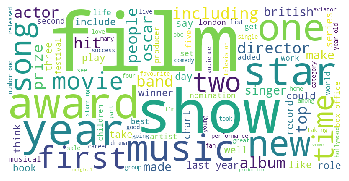

In [13]:
cloud = WordCloud(width=800,height=400,min_word_length=3,background_color="white", max_words=100, stopwords=stopwords)
text=dfentert['Title'].str.cat(sep='\n')
text1=dfentert['Content'].str.cat(sep='\n')
entertainment_cloud = cloud.generate(text+text1)
plt.figure()
plt.imshow(entertainment_cloud)
plt.axis("off")
print("Entertainment cloud")
plt.show()

Politics cloud


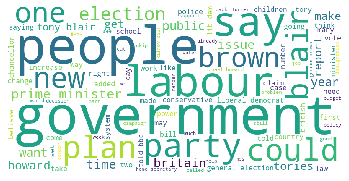

In [14]:
cloud = WordCloud(width=800,height=400,min_word_length=3,background_color="white", max_words=100, stopwords=stopwords)
text=dfpol['Title'].str.cat(sep='\n')
text1=dfpol['Content'].str.cat(sep='\n')
politics_cloud = cloud.generate(text+text1)
plt.figure()
plt.imshow(politics_cloud)
plt.axis("off")
print("Politics cloud")
plt.show()

In [15]:
#2

In [16]:
from sklearn import svm
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import MultinomialNB

In [17]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(results, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(results)
    y_test = lb.transform(results)
    y_pred = lb.transform(y_pred)
    print('Roc_auc:' , roc_auc_score(y_test, y_pred, average=average))

In [18]:
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(df['Content'])
test_counts = count_vect.transform(test['Content'])

In [19]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')
import gensim
from gensim import models
from gensim.models import Word2Vec, KeyedVectors
from cltk.vector.word2vec import get_sims

In [20]:
clf1 = svm.SVC(gamma = 'scale' , C = 5. , kernel = 'rbf' , probability=True)
clf1.fit(train_counts,df['Category'])

print("Support Vector Machines using BoW\n")
print ("10-fold cross validation:")
accuracy = cross_val_score(clf1, train_counts, df['Category'], cv=10, scoring='accuracy')
print ('Accuracy', np.mean(accuracy))
precisions = cross_val_score(clf1, train_counts, df['Category'], cv=10, scoring='precision_weighted')
print ('Precision', np.mean(precisions))
recalls = cross_val_score(clf1, train_counts, df['Category'], cv=10, scoring='recall_weighted')
print ('Recalls', np.mean(recalls))
f1s = cross_val_score(clf1, train_counts, df['Category'], cv=10, scoring='f1_weighted')
print ('F1', np.mean(f1s))

pred = clf1.predict(test_counts)
print ('\nTest data accuracy: ', accuracy_score(results['Category'], pred))
multiclass_roc_auc_score(results['Category'],pred, average='weighted' )


Support Vector Machines using BoW

10-fold cross validation:
Accuracy 0.954467523796588
Precision 0.9554031715804282
Recalls 0.954467523796588
F1 0.9543475403440551

Test data accuracy:  0.9595505617977528
Roc_auc: 0.9745325096354446


In [21]:
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(train_counts,df['Category'])

print("Random Forests using BoW\n")
print ("10-fold cross validation:")
accuracy = cross_val_score(clf2, train_counts, df['Category'], cv=10, scoring='accuracy')
print ('Accuracy', np.mean(accuracy))
precisions = cross_val_score(clf2, train_counts, df['Category'], cv=10, scoring='precision_weighted')
print ('Precision', np.mean(precisions))
recalls = cross_val_score(clf2, train_counts, df['Category'], cv=10, scoring='recall_weighted')
print ('Recalls', np.mean(recalls))
f1s = cross_val_score(clf2, train_counts, df['Category'], cv=10, scoring='f1_weighted')
print ('F1', np.mean(f1s))

pred = clf2.predict(test_counts)
print ('Test data accuracy:', accuracy_score(results['Category'], pred))
multiclass_roc_auc_score(results['Category'],pred, average='weighted' )

Random Forests using BoW

10-fold cross validation:
Accuracy 0.9466395920448363
Precision 0.9583842424063599
Recalls 0.9545149625029934
F1 0.9548778546719685
Test data accuracy: 0.9550561797752809
Roc_auc: 0.9713423015774064


In [22]:
clf3 = ComplementNB()
clf3.fit(train_counts,df['Category'])

print("Naive Bayes using BoW\n")
print ("10-fold cross validation:")
accuracy = cross_val_score(clf3, train_counts, df['Category'], cv=10, scoring='accuracy')
print ('Accuracy', np.mean(accuracy))
precisions = cross_val_score(clf3, train_counts, df['Category'], cv=10, scoring='precision_weighted')
print ('Precision', np.mean(precisions))
recalls = cross_val_score(clf3, train_counts, df['Category'], cv=10, scoring='recall_weighted')
print ('Recalls', np.mean(recalls))
f1s = cross_val_score(clf3, train_counts, df['Category'], cv=10, scoring='f1_weighted')
print ('F1', np.mean(f1s))

pred = clf3.predict(test_counts)
print ('Test data accuracy:', accuracy_score(results['Category'], pred))
multiclass_roc_auc_score(results['Category'],pred, average='weighted' )


Naive Bayes using BoW

10-fold cross validation:
Accuracy 0.9702300685933268
Precision 0.9711144934270284
Recalls 0.9702300685933268
F1 0.9702294143126075
Test data accuracy: 0.9842696629213483
Roc_auc: 0.9903079174327385


In [23]:
vectorizer = TfidfVectorizer()
tf_idf_train = vectorizer.fit_transform(df['Content'])
tf_idf_test = vectorizer.transform(test['Content'])

In [24]:
clf1 = svm.SVC(gamma = 'scale' , C = 5. , kernel = 'rbf')
clf1.fit(tf_idf_train,df['Category'])

print("Support Vector Machines using tf-idf\n")
print ("10-fold cross validation:")
accuracy = cross_val_score(clf1, train_counts, df['Category'], cv=10, scoring='accuracy')
print ('Accuracy', np.mean(accuracy))
precisions = cross_val_score(clf1, tf_idf_train, df['Category'], cv=10, scoring='precision_weighted')
print ('Precision', np.mean(precisions))
recalls = cross_val_score(clf1, tf_idf_train, df['Category'], cv=10, scoring='recall_weighted')
print ('Recalls', np.mean(recalls))
f1s = cross_val_score(clf1, tf_idf_train, df['Category'], cv=10, scoring='f1_weighted')
print ('F1', np.mean(f1s))

pred = clf1.predict(tf_idf_test)
print ('Test data accuracy:', accuracy_score(results['Category'], pred))
multiclass_roc_auc_score(results['Category'],pred, average='weighted' )

Support Vector Machines using tf-idf

10-fold cross validation:
Accuracy 0.954467523796588
Precision 0.9712429418372602
Recalls 0.9702427327379862
F1 0.9702627947641898
Test data accuracy: 0.9707865168539326
Roc_auc: 0.9816565808669321


In [25]:
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(tf_idf_train,df['Category'])

print("Random Forests using tf-idf\n")
print ("10-fold cross validation:")
accuracy = cross_val_score(clf2, train_counts, df['Category'], cv=10, scoring='accuracy')
print ('Accuracy', np.mean(accuracy))
precisions = cross_val_score(clf2, tf_idf_train, df['Category'], cv=10, scoring='precision_weighted')
print ('Precision', np.mean(precisions))
recalls = cross_val_score(clf2, tf_idf_train, df['Category'], cv=10, scoring='recall_weighted')
print ('Recalls', np.mean(recalls))
f1s = cross_val_score(clf2, tf_idf_train, df['Category'], cv=10, scoring='f1_weighted')
print ('F1', np.mean(f1s))

pred = clf2.predict(tf_idf_test)
print ('Test data accuracy:', accuracy_score(results['Category'], pred))
multiclass_roc_auc_score(results['Category'],pred, average='weighted' )

Random Forests using tf-idf

10-fold cross validation:
Accuracy 0.9511503117923784
Precision 0.9558410450734771
Recalls 0.9556512221532707
F1 0.9550527871857006
Test data accuracy: 0.9483146067415731
Roc_auc: 0.9667933978671943


In [26]:
clf3 = ComplementNB()
clf3.fit(tf_idf_train,df['Category'])

print("Naive Bayes using tf-idf\n")
print ("10-fold cross validation:")
accuracy = cross_val_score(clf3, train_counts, df['Category'], cv=10, scoring='accuracy')
print ('Accuracy', np.mean(accuracy))
precisions = cross_val_score(clf3, tf_idf_train, df['Category'], cv=10, scoring='precision_weighted')
print ('Precision', np.mean(precisions))
recalls = cross_val_score(clf3, tf_idf_train, df['Category'], cv=10, scoring='recall_weighted')
print ('Recalls', np.mean(recalls))
f1s = cross_val_score(clf3, tf_idf_train, df['Category'], cv=10, scoring='f1_weighted')
print ('F1', np.mean(f1s))

pred = clf3.predict(tf_idf_test)
print ('Test data accuracy:', accuracy_score(results['Category'], pred))
multiclass_roc_auc_score(results['Category'],pred, average='weighted' )

Naive Bayes using tf-idf

10-fold cross validation:
Accuracy 0.9702300685933268
Precision 0.9691640770030061
Recalls 0.9679891552430158
F1 0.9679890422058668
Test data accuracy: 0.9820224719101124
Roc_auc: 0.9888350129476687


In [27]:
from sklearn.metrics.pairwise import cosine_similarity
from collections import Counter

In [28]:
def my_KNN(train,test,train_results,k):
    cs = cosine_similarity(test,train)
    cs = np.argsort(-cs , axis = 1)
    prediction = []
    for i in range(cs.shape[0]):
        l=[]
        for j in range(k):
            l.append(train_results[cs[i,j]])
        #prediction.append(find_majority(l))
        c = Counter(l)
        prediction.append(c.most_common(1)[0][0])
    return prediction
        
# def find_majority(k):
#     myMap = {}
#     maxValue = 0
#     maxElement = ''
#     for n in k:
#         if n in myMap:
#             myMap[n] += 1
#         else:
#             myMap[n] = 1
#         if myMap[n] > maxValue:
#             maxValue = myMap[n]
#             maxElement = n
#     return maxElement

In [29]:
knn_count = my_KNN(train_counts, test_counts, df['Category'], 6)
print ('My_KNN accuracy for BoW:', accuracy_score(results['Category'], knn_count))
knn_tf_idf = my_KNN(tf_idf_train, tf_idf_test, df['Category'], 6)
print ('My_KNN accuracy for Tf-idf:', accuracy_score(results['Category'], knn_tf_idf))

My_KNN accuracy for BoW: 0.802247191011236
My_KNN accuracy for Tf-idf: 0.9168539325842696


In [30]:
#4

In [31]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from nltk.cluster import KMeansClusterer
from sklearn import preprocessing

In [32]:
train_counts_norm = preprocessing.normalize(train_counts)
tf_idf_train_norm = preprocessing.normalize(tf_idf_train)

In [33]:
kmeans1 = KMeans(n_clusters=5, random_state=0).fit(train_counts_norm)

In [34]:
kmeans2 = KMeans(n_clusters=5, random_state=0).fit(tf_idf_train_norm)

In [35]:
model = Word2Vec(df['Content'], min_count=1)
train_word2vec = model[model.wv.vocab]

C:\Anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [36]:
kclusterer = KMeansClusterer(5, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(train_word2vec, assign_clusters=True)
kmeans3 = KMeans(n_clusters=5, random_state=0).fit(train_word2vec)

In [37]:
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import TruncatedSVD

In [38]:
SVD = TruncatedSVD(n_components=2)
SVD.fit(train_counts_norm)
scores_SVD = SVD.transform(train_counts_norm)

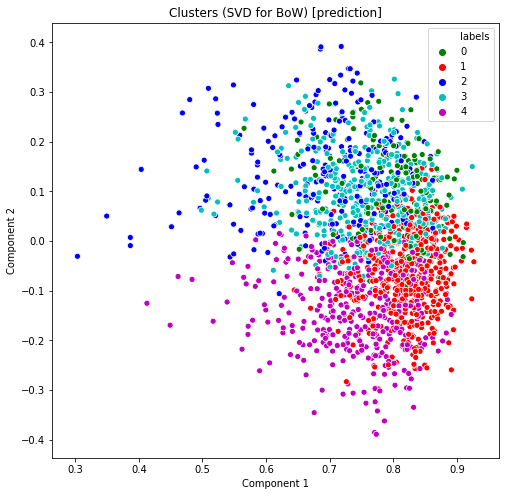

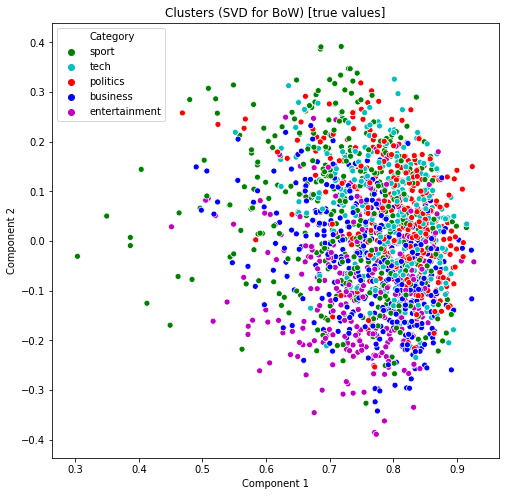

In [39]:
from seaborn import scatterplot

cluster_labels = pd.DataFrame(data=scores_SVD, columns = ['Component 1','Component 2'])
cluster_labels['labels'] = kmeans1.labels_
x_axis = cluster_labels['Component 1']
y_axis = cluster_labels['Component 2']

plt.figure(figsize=(8,8))
scatterplot(x_axis,y_axis, hue = cluster_labels['labels'], palette = ['g', 'r', 'b' , 'c' , 'm'])
plt.title('Clusters (SVD for BoW) [prediction]')

plt.figure(figsize=(8,8))
scatterplot(x_axis,y_axis, hue = df['Category'], palette = ['g', 'c' ,'r',   'b', 'm'])
plt.title('Clusters (SVD for BoW) [true values]')

plt.show()

In [40]:
SVD = TruncatedSVD(n_components=2)
SVD.fit(train_counts_norm)

scores_SVD = SVD.transform(tf_idf_train_norm)

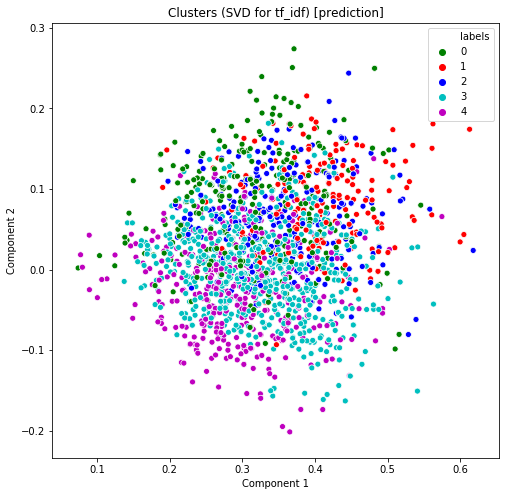

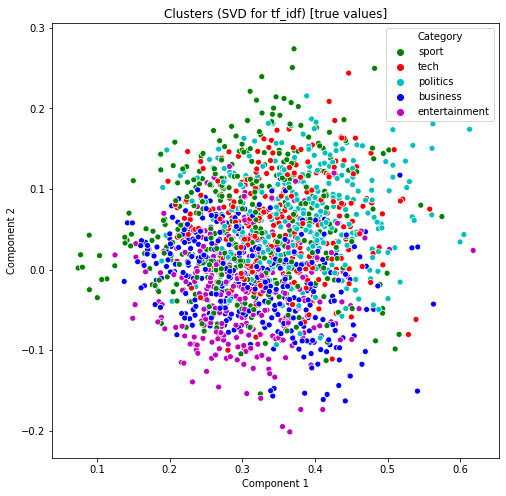

In [41]:
cluster_labels = pd.DataFrame(data=scores_SVD, columns = ['Component 1','Component 2'])
cluster_labels['labels'] = kmeans2.labels_
x_axis = cluster_labels['Component 1']
y_axis = cluster_labels['Component 2']

plt.figure(figsize=(8,8))
scatterplot(x_axis,y_axis, hue = cluster_labels['labels'], palette = ['g', 'r', 'b' , 'c' , 'm'])
plt.title('Clusters (SVD for tf_idf) [prediction]')

plt.figure(figsize=(8,8))
scatterplot(x_axis,y_axis, hue = df['Category'], palette = ['g', 'r',  'c' , 'b', 'm'])
plt.title('Clusters (SVD for tf_idf) [true values]')

plt.show()

In [42]:
train_word2vec = np.array(train_word2vec)


In [43]:
SVD = TruncatedSVD(n_components=2)
SVD.fit(train_word2vec)
scores_SVD = SVD.transform(train_word2vec)

In [44]:
# from gensim.test.utils import common_texts, get_tmpfile
# from gensim.models import Word2Vec

# wc = KeyedVectors.load_word2vec_format('model.bin', binary=True)
# wc= model[model.wv.vocab]

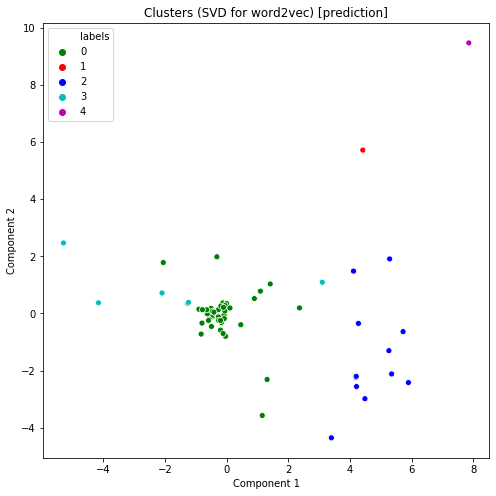

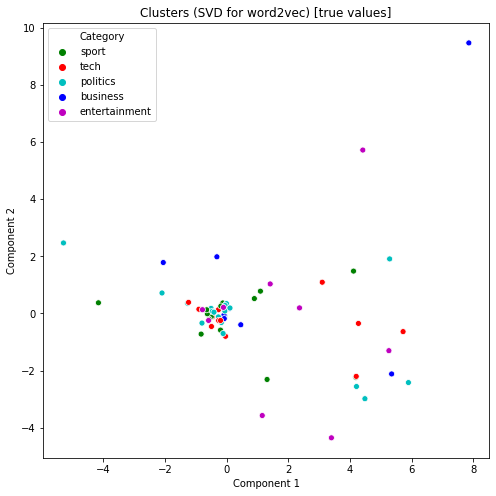

In [45]:
cluster_labels = pd.DataFrame(data=scores_SVD, columns = ['Component 1','Component 2'])
cluster_labels['labels'] = kmeans3.labels_
x_axis = cluster_labels['Component 1']
y_axis = cluster_labels['Component 2']

plt.figure(figsize=(8,8))
scatterplot(x_axis,y_axis, hue = cluster_labels['labels'], palette = ['g', 'r', 'b' , 'c' , 'm'])
plt.title('Clusters (SVD for word2vec) [prediction]')

plt.figure(figsize=(8,8))
scatterplot(x_axis,y_axis, hue = df['Category'], palette = ['g', 'r',  'c' , 'b', 'm'])
plt.title('Clusters (SVD for word2vec) [true values]')

plt.show()

In [46]:
#3

In [47]:
df2=df.copy()
test2=test.copy()

In [48]:
df2['Content']=df2['Content'].apply(stem_text)
test2['Content']=test2['Content'].apply(stem_text)

In [49]:
# df2['Content'] = df2['Content'].apply(lemmatize_text)
# test2['Content'] = test2['Content'].apply(lemmatize_text)

In [50]:
df3=df2.copy()
test3=test2.copy()

In [51]:
def remove_stops(row):
    my_list = row.copy()
    meaningful_words = [w for w in my_list if not w in stopwords]
    return (meaningful_words)


In [52]:
df3['Content']=remove_stops(df3['Content'])
test3['Content']=remove_stops(test3['Content'])

In [53]:
count_vect = CountVectorizer()
train_counts = count_vect.fit_transform(df3['Content'])
test_counts = count_vect.transform(test3['Content'])

In [54]:
clf3 = ComplementNB()
clf3.fit(train_counts,df3['Category'])

print("Naive Bayes using BoW\n")
print ("10-fold cross validation:")
accuracy = cross_val_score(clf3, train_counts, df3['Category'], cv=10, scoring='accuracy')
print ('Accuracy', np.mean(accuracy))
precisions = cross_val_score(clf3, train_counts, df3['Category'], cv=10, scoring='precision_weighted')
print ('Precision', np.mean(precisions))
recalls = cross_val_score(clf3, train_counts, df3['Category'], cv=10, scoring='recall_weighted')
print ('Recalls', np.mean(recalls))
f1s = cross_val_score(clf3, train_counts, df3['Category'], cv=10, scoring='f1_weighted')
print ('F1', np.mean(f1s))

pred = clf3.predict(test_counts)

Naive Bayes using BoW

10-fold cross validation:
Accuracy 0.9679891197793443
Precision 0.9691993012093667
Recalls 0.9679891197793443
F1 0.9679769913518804


In [55]:
print ('Test data accuracy:', accuracy_score(results['Category'], pred))
multiclass_roc_auc_score(results['Category'],pred, average='weighted' )

Test data accuracy: 0.9870125713001185
Roc_auc: 0.9938501914852167
